### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
!pip install  matplotlib

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"


In [ ]:
datos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
print(datos.columns)




Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


### **Ingresos por tienda:**

In [ ]:
ingresos = datos.groupby("Tienda")["Precio"].sum().round().sort_values()
print(ingresos.astype(int))

Tienda
Tienda 4    1038375700
Tienda 3    1098019600
Tienda 2    1116343500
Tienda 1    1150880400
Name: Precio, dtype: int64


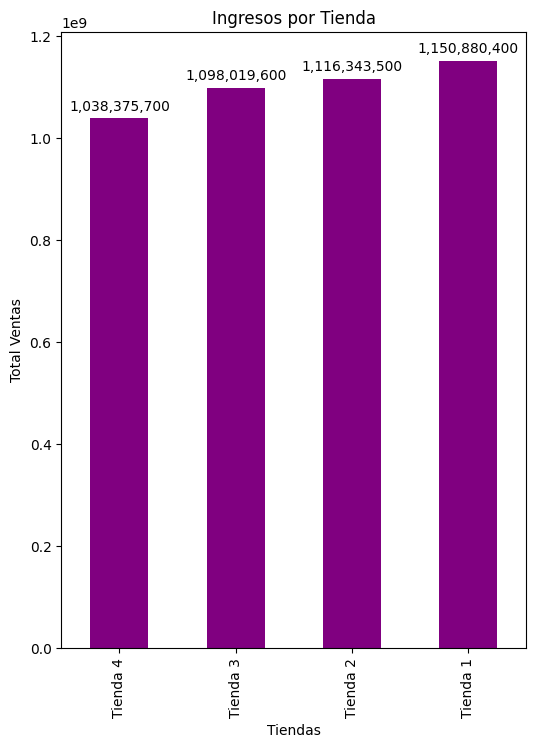

In [ ]:
plt.figure(figsize=(6,8))
ax = ingresos.plot(kind="bar", title="Ingresos por Tienda", ylabel="Total Ventas", color="purple")
ax.set_xlabel("Tiendas")
for p in ax.patches: # ax.patches es la lista de todas las barras
    ax.annotate(f"{int(p.get_height()):,}", # Formatea el número
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

# 2. Ventas por categoría

In [ ]:
ventas_categoria = datos.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad")


In [ ]:
populares_por_tienda = ventas_categoria.sort_values(["Tienda", "Cantidad"], ascending=[True, False])
populares_por_tienda = populares_por_tienda.groupby("Tienda").head(3)
print(populares_por_tienda)


      Tienda Categoría del Producto  Cantidad
7   Tienda 1                Muebles       465
3   Tienda 1           Electrónicos       448
5   Tienda 1               Juguetes       324
15  Tienda 2                Muebles       442
11  Tienda 2           Electrónicos       422
13  Tienda 2               Juguetes       313
23  Tienda 3                Muebles       499
19  Tienda 3           Electrónicos       451
21  Tienda 3               Juguetes       315
31  Tienda 4                Muebles       480
27  Tienda 4           Electrónicos       451
29  Tienda 4               Juguetes       338


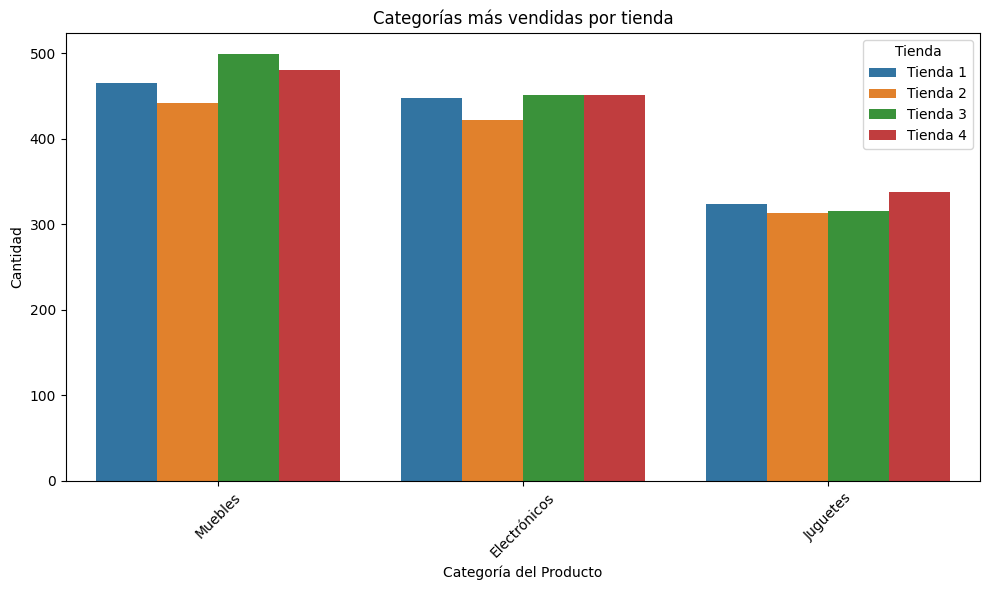

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=populares_por_tienda, x="Categoría del Producto", y="Cantidad", hue="Tienda")
plt.title("Categorías más vendidas por tienda")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
print(datos["Calificación"].value_counts())


Calificación
5    5250
4    1813
1    1199
3     830
2     343
Name: count, dtype: int64


In [ ]:
# Agrupar los datos por tienda y calcular el promedio de calificación
calificaciones_promedio = datos.groupby("Tienda")["Calificación"].mean().reset_index()

# Redondeamos el promedio a 2 decimales para que sea más legible
calificaciones_promedio["Calificación"] = calificaciones_promedio["Calificación"].round(2)

# Mostrar los resultados
print(calificaciones_promedio)


     Tienda  Calificación
0  Tienda 1          3.98
1  Tienda 2          4.04
2  Tienda 3          4.05
3  Tienda 4          4.00


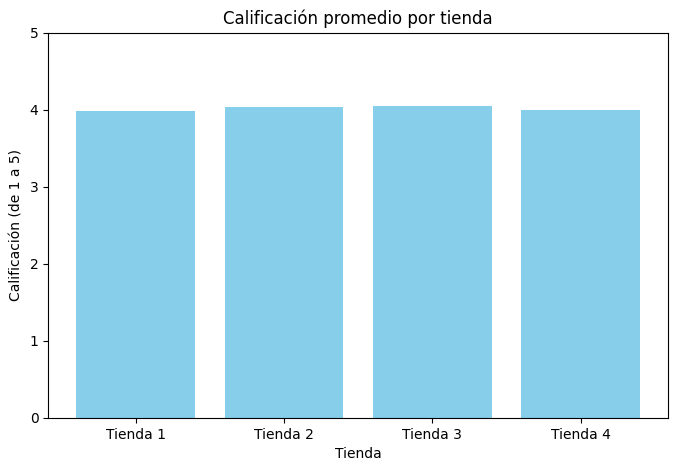

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(calificaciones_promedio["Tienda"], calificaciones_promedio["Calificación"], color="skyblue")
plt.ylim(0, 5)
plt.title("Calificación promedio por tienda")
plt.ylabel("Calificación (de 1 a 5)")
plt.xlabel("Tienda")
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
ventas_por_producto = datos.groupby(["Tienda", "Producto"]).size().reset_index(name="Ventas")
ventas_por_producto = ventas_por_producto.sort_values(["Tienda", "Ventas"], ascending=[True, False])
ventas_por_producto = ventas_por_producto.groupby("Tienda").head(3)
print(ventas_por_producto.head())


      Tienda                   Producto  Ventas
1   Tienda 1                    Armario      60
33  Tienda 1                 Microondas      60
48  Tienda 1              TV LED UHD 4K      60
75  Tienda 2  Iniciando en programación      65
84  Tienda 2                 Microondas      62


In [ ]:
# Producto más vendido por tienda
productos_mas_vendidos = ventas_por_producto.loc[ventas_por_producto.groupby("Tienda")["Ventas"].idxmax()]

# Producto menos vendido por tienda
productos_menos_vendidos = ventas_por_producto.loc[ventas_por_producto.groupby("Tienda")["Ventas"].idxmin()]

# Mostramos los resultados
print("Productos MÁS vendidos:")
print(productos_mas_vendidos)

print("\nProductos MENOS vendidos:")
print(productos_menos_vendidos)


Productos MÁS vendidos:
       Tienda                   Producto  Ventas
1    Tienda 1                    Armario      60
75   Tienda 2  Iniciando en programación      65
129  Tienda 3              Kit de bancas      57
163  Tienda 4                   Cama box      62

Productos MENOS vendidos:
       Tienda   Producto  Ventas
1    Tienda 1    Armario      60
58   Tienda 2    Batería      61
113  Tienda 3  Cama king      56
164  Tienda 4  Cama king      56


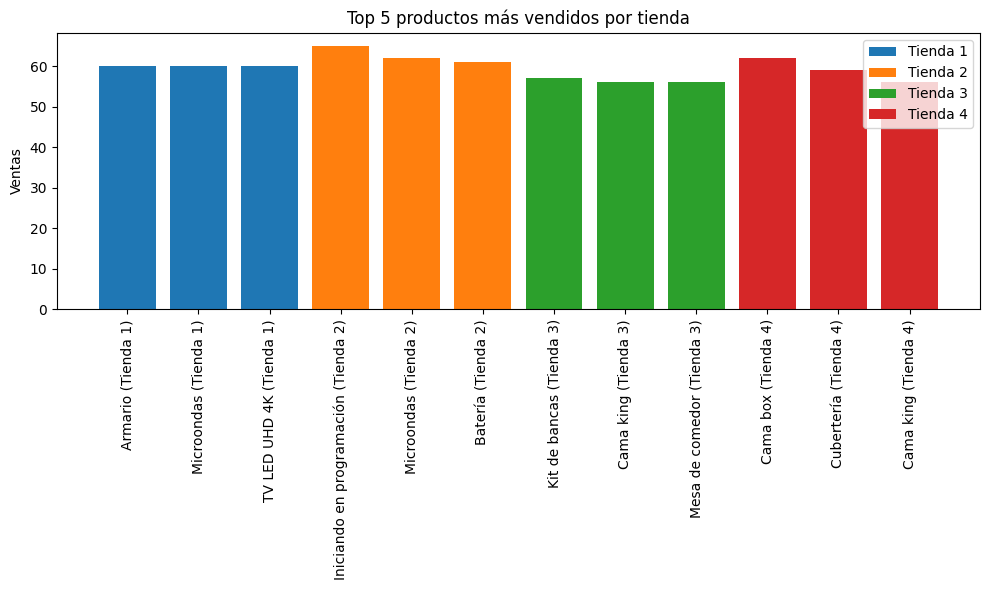

In [ ]:
plt.figure(figsize=(10,6))
for tienda in datos["Tienda"].unique():
    top = ventas_por_producto[ventas_por_producto["Tienda"] == tienda].sort_values("Ventas", ascending=False).head(5)
    plt.bar(top["Producto"] + " (" + tienda + ")", top["Ventas"], label=tienda)

plt.xticks(rotation=90)
plt.ylabel("Ventas")
plt.title("Top 5 productos más vendidos por tienda")
plt.legend()
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
# Agrupar por tienda y calcular el promedio del costo de envío
envio_promedio = datos.groupby("Tienda")["Costo de envío"].mean().reset_index()

# Redondear los valores a 2 decimales para mejor presentación
envio_promedio["Costo de envío"] = envio_promedio["Costo de envío"].round(2)

# Mostrar el resultado
print(envio_promedio)


     Tienda  Costo de envío
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46


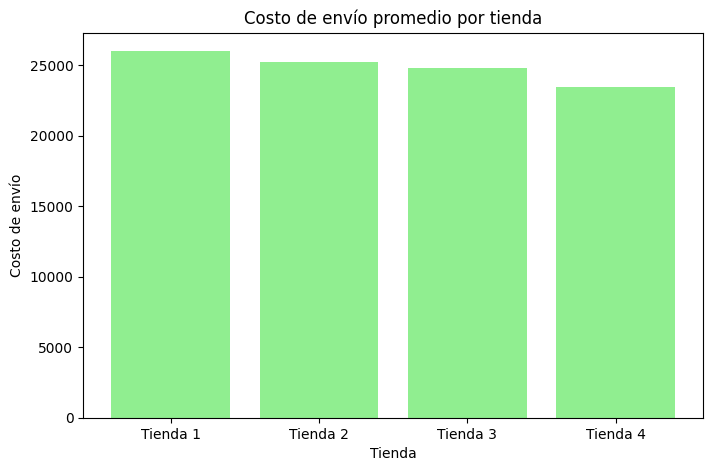

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(envio_promedio["Tienda"], envio_promedio["Costo de envío"], color="lightgreen")
plt.title("Costo de envío promedio por tienda")
plt.ylabel("Costo de envío")
plt.xlabel("Tienda")
plt.show()

# **Gráfico de barras: Ingresos por tienda**

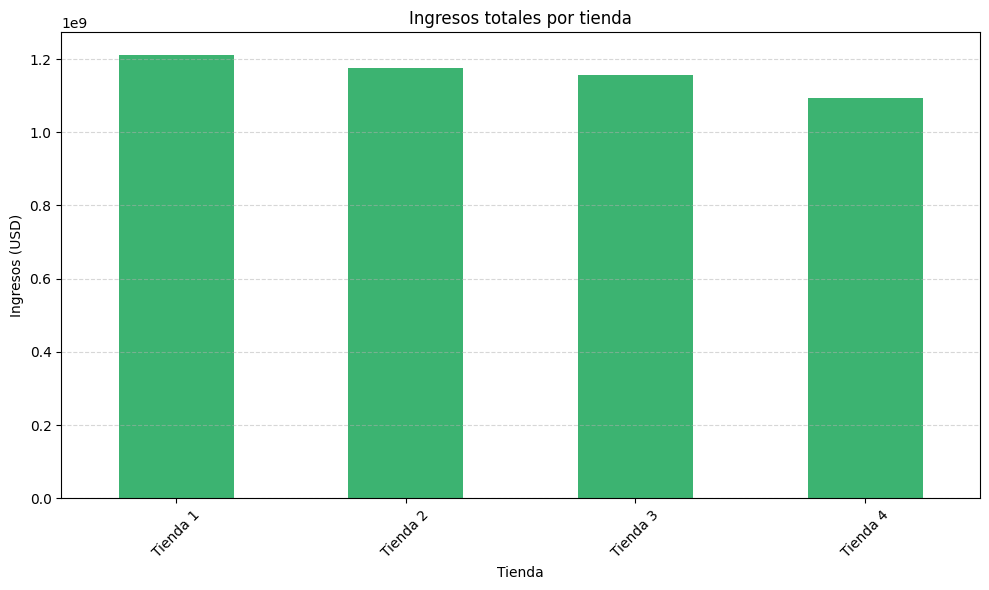

In [ ]:
import matplotlib.pyplot as plt

# Calculamos ingresos (Precio + Costo de envío)
datos["Ingresos"] = datos["Precio"] + datos["Costo de envío"]

# Ingresos totales por tienda
ingresos_por_tienda = datos.groupby("Tienda")["Ingresos"].sum().sort_values(ascending=False)

# Gráfico de barras
plt.figure(figsize=(10,6))
ingresos_por_tienda.plot(kind="bar", color="mediumseagreen")
plt.title("Ingresos totales por tienda")
plt.ylabel("Ingresos (USD)")
plt.xlabel("Tienda")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# **Gráfico de pastel: Distribución de categorías de productos**

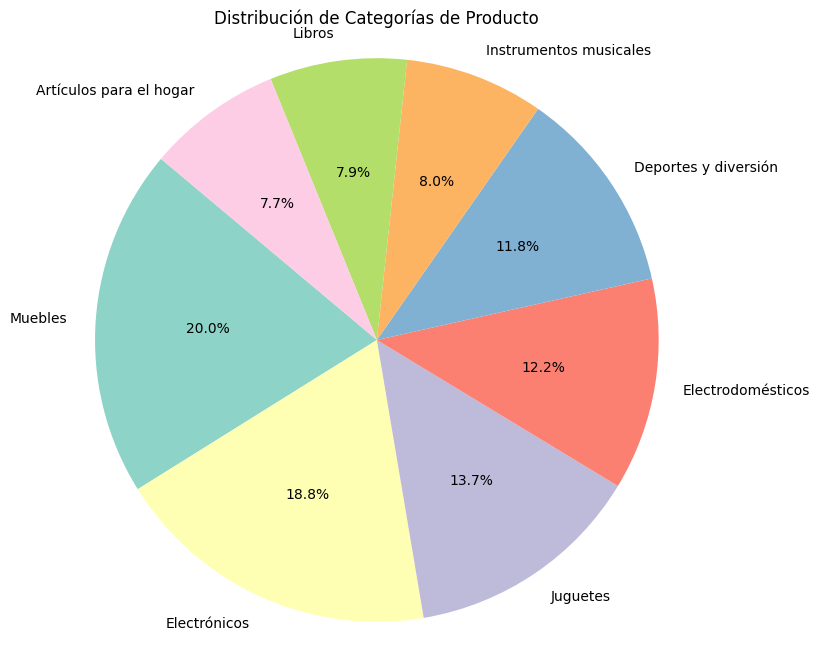

In [ ]:
# Conteo de productos por categoría
categorias = datos["Categoría del Producto"].value_counts()

# Gráfico de pastel
plt.figure(figsize=(8,8))
plt.pie(categorias, labels=categorias.index, autopct="%1.1f%%", startangle=140, colors=plt.cm.Set3.colors)
plt.title("Distribución de Categorías de Producto")
plt.axis("equal")  # para que sea un círculo perfecto
plt.show()


# **Gráfico de dispersión: Relación entre precio y calificación**

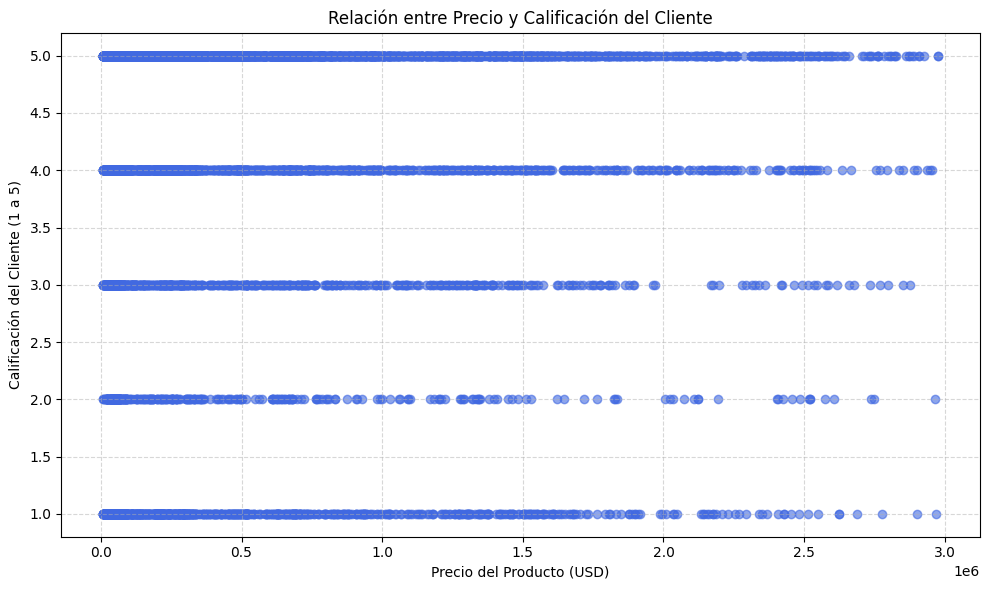

In [ ]:
# Gráfico de dispersión
plt.figure(figsize=(10,6))
plt.scatter(datos["Precio"], datos["Calificación"], alpha=0.6, color="royalblue")
plt.title("Relación entre Precio y Calificación del Cliente")
plt.xlabel("Precio del Producto (USD)")
plt.ylabel("Calificación del Cliente (1 a 5)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# **Gráfico de barras apiladas: Productos más vendidos por tienda y categoría**

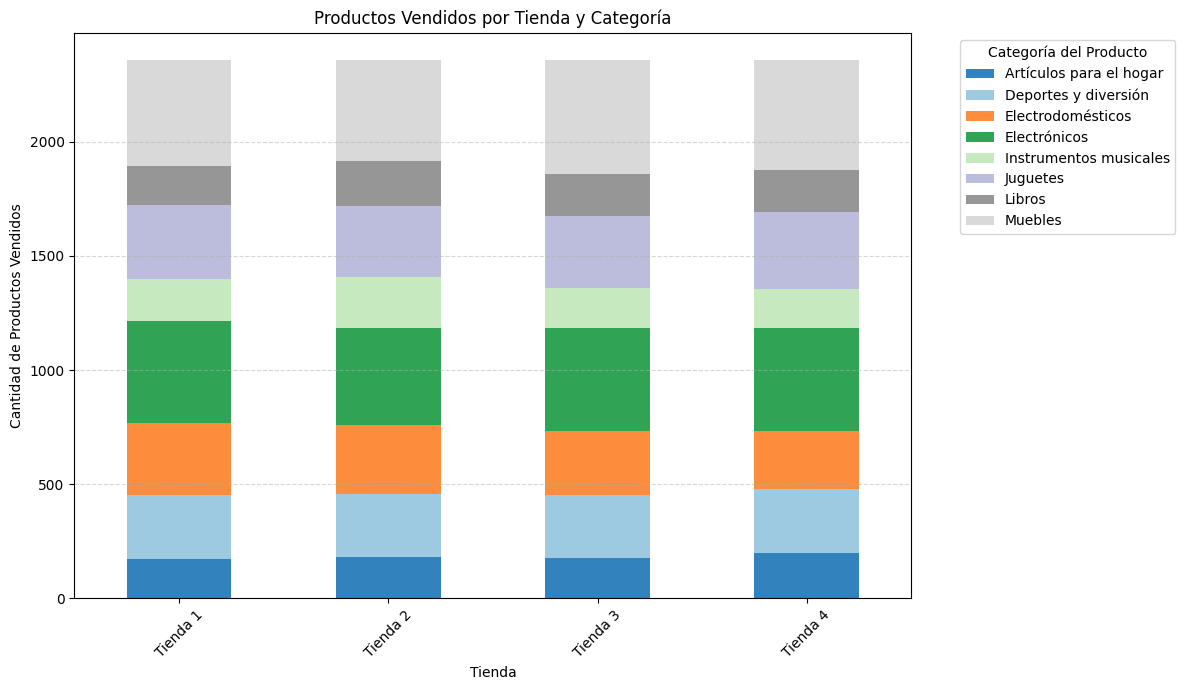

In [ ]:
# Agrupamos por tienda y categoría de producto, y contamos ventas
ventas = datos.groupby(["Tienda", "Categoría del Producto"])["Producto"].count().unstack(fill_value=0)

# Gráfico de barras apiladas
ventas.plot(kind="bar", stacked=True, figsize=(12, 7), colormap="tab20c")
plt.title("Productos Vendidos por Tienda y Categoría")
plt.xlabel("Tienda")
plt.ylabel("Cantidad de Productos Vendidos")
plt.xticks(rotation=45)
plt.legend(title="Categoría del Producto", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


# **INFORME FINAL**

# Informe de Recomendación para la Venta de Tienda

## Objetivo

El objetivo de este informe es recomendar la tienda más estratégica para que el Sr. Juan venda, basándose en los ingresos, categorías de productos más y menos vendidas, satisfacción del cliente, rendimiento de productos y costos de envío.

---

## Hallazgos Clave

### 1. **Ingresos Totales por Tienda**:

* **Tienda 1**: 1,150,880,400
* **Tienda 2**: 1,116,343,500
* **Tienda 3**: 1,098,019,600
* **Tienda 4**: 1,038,375,700

Tienda 1 lidera en ingresos totales, seguida por Tienda 2, Tienda 3 y Tienda 4.

### 2. **Ventas por Categoría**:

* **Categorías más vendidas**: Muebles, Electrónicos, y Juguetes en todas las tiendas.
* **Tienda 3**: Lidera en ventas de Muebles (499 unidades) y Electrónicos (451 unidades).
* **Tienda 2**: Destaca con 442 ventas de Muebles y 422 de Electrónicos.

### 3. **Calificación Promedio de Clientes**:

* **Tienda 3**: 4.05 (más alta)
* **Tienda 2**: 4.04
* **Tienda 4**: 4.00
* **Tienda 1**: 3.98 (más baja)

Las calificaciones promedio de las tiendas son bastante altas, con Tienda 3 liderando en satisfacción del cliente.

### 4. **Productos Más y Menos Vendidos**:

* **Tienda 1**: Armario, Microondas, TV LED UHD 4K (60 unidades cada uno)
* **Tienda 2**: Iniciando en programación (65 unidades), Microondas (62 unidades)
* **Tienda 3**: Kit de bancas (57 unidades)
* **Tienda 4**: Cama box (62 unidades)

**Productos menos vendidos**: La **Cama king** (56 unidades) en Tienda 3 y Tienda 4 muestra un bajo rendimiento.

### 5. **Costo de Envío Promedio por Tienda**:

* **Tienda 4**: 23,459.46 (más bajo)
* **Tienda 3**: 24,805.68
* **Tienda 2**: 25,216.24
* **Tienda 1**: 26,018.61 (más alto)

Aunque Tienda 4 tiene el costo de envío más bajo, esto no ha sido suficiente para incrementar sus ventas.

---

## Tabla de Indicadores Clave

| **Indicador**                | **Tienda 1**                                         | **Tienda 2**                                                    | **Tienda 3**                                            | **Tienda 4**                                                     |
| ---------------------------- | ---------------------------------------------------- | --------------------------------------------------------------- | ------------------------------------------------------- | ---------------------------------------------------------------- |
| **Ingresos Totales**         | 1,150,880,400                                        | 1,116,343,500                                                   | 1,098,019,600                                           | 1,038,375,700                                                    |
| **Calificación Promedio**    | 3.98                                                 | 4.04                                                            | 4.05                                                    | 4.00                                                             |
| **Costo de Envío Promedio**  | 26,018.61                                            | 25,216.24                                                       | 24,805.68                                               | 23,459.46                                                        |
| **Productos Más Vendidos**   | Armario, Microondas, TV LED UHD 4K                   | Iniciando en programación, Microondas                           | Kit de bancas                                           | Cama box                                                         |
| **Productos Menos Vendidos** | Armario                                              | Batería                                                         | Cama king                                               | Cama king                                                        |
| **Ventas por Categoría**     | Muebles, Electrónicos, Juguetes                      | Muebles, Electrónicos, Juguetes                                 | Muebles, Electrónicos, Juguetes                         | Muebles, Electrónicos, Juguetes                                  |
| **Fortalezas**               | Altos ingresos, variedad de productos populares      | Buenas calificaciones, alto potencial en productos electrónicos | Buen rendimiento en muebles y electrónicos              | Bajo costo de envío                                              |
| **Debilidades**              | Calificación ligeramente baja, costos de envío altos | Ingresos menores, productos menos populares                     | Ingresos menores, bajo rendimiento de algunos productos | Bajos ingresos, bajo rendimiento de productos y alta competencia |

---

## Análisis

* **Tienda 1**: Tiene el mayor volumen de ingresos y una buena variedad de productos populares, pero presenta costos de envío altos y su calificación es ligeramente inferior en comparación con las otras tiendas.
* **Tienda 2**: Aunque tiene buenas calificaciones y un rendimiento equilibrado en diversas categorías, sus ingresos son más bajos en comparación con Tienda 1.
* **Tienda 3**: Presenta buenos ingresos, especialmente en categorías como muebles y electrónicos, pero tiene algunos productos con bajo rendimiento. Su calificación es la más alta.
* **Tienda 4**: Aunque tiene el costo de envío más bajo, sus ingresos y ventas en productos clave son los más bajos. La baja rentabilidad de ciertos productos, como la **Cama king**, es un punto débil.

---

## Recomendación: Vender Tienda 4

### Justificación:

* **Bajos Ingresos**: Tienda 4 tiene los ingresos más bajos, lo que sugiere que no está maximizando su potencial de ventas.
* **Productos Menos Vendidos**: Algunos productos, como la **Cama king**, tienen un bajo rendimiento, lo que refleja debilidad en el catálogo de productos.
* **Costo de Envío**: Aunque tiene el costo de envío más bajo, este factor no ha sido suficiente para aumentar las ventas.
* **Calificación Promedio**: Con una calificación de 4.00, Tienda 4 tiene una satisfacción aceptable, pero no sobresale frente a otras tiendas con calificaciones más altas.
* **Potencial de Crecimiento Limitado**: A pesar de su bajo costo de envío, la tienda muestra un rendimiento limitado y no tiene el mismo potencial de crecimiento que otras tiendas.

---

## **Conclusión**

Se recomienda vender Tienda 4 y concentrarse en las tiendas con mejores ingresos y mayores perspectivas de crecimiento, como Tienda 1 y Tienda 2.

